## Exercise 3


*Power-laws are ubiquitous in astrophysics, and exoplanet demographics are no exception, and they all follow the general expression:*
$$y = x^{\alpha}$$

*Using the NASA Exoplanet archive API, find the empirical $\alpha$ for the following parameter pairs, as well as a corresponding* $\log-
\log$ *plot*:
- *Period vs Semi-Major Axis, in Days and AU, respectively*
- *Mass vs Radius, in Earth masses/radii respectively, for planets below 100 Earth masses*
- *Mass vs Radius, in Earth masses/radii respectively, for planets above 100 Earth masses*
- *Eccentricity vs Period*

*Comment on how well each trend fits. Be sure to include error bars! You can use `matplotlib`'s [`plt.errorbar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html) to plot these easily.*

*HINT: You will want to use [`np.polynomial.polynomial.polyfit`](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyfit.html).*

## Solution
**This solution shows the workflow for the first data set, for period vs semi-major axis. The other three follow a similar paradigm**

Begin by querying the appropriate tables from the archive:

In [53]:
from astroquery.ipac.nexsci.nasa_exoplanet_archive import NasaExoplanetArchive as NEA
from matplotlib import pyplot as plt
import numpy as np

## Be sure to specify that both x and y axis data have 'not null' specified! This ensures the x and y columns will be of
## equal length, and avoids NANs
data_1 = NEA.query_criteria(table='pscomppars', where='pl_orbper is not null and pl_orbsmax is not null',
                            select='pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2')
# data_2 = NEA.query_criteria(table='pscomppars', 
#                             select='pl_masse,pl_masseerr1,pl_masseerr2,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2',where='pl_masse<100')
# data_3 = NEA.query_criteria(table='pscomppars', 
#                             select='pl_masse,pl_masseerr1,pl_masseerr2,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2', where='pl_masse>100')
# data_4 = NEA.query_criteria(table='pscomppars', 
#                             select='pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbper,pl_orbpererr1,pl_orbpererr2')

Since we are taking a $\log-\log$ plot, we need to transform both the data and the uncertainties.

### Propagating $\log$ Uncertainties
To propagate $\log$ uncertainties, assume we have $y=\ln{(x)}$, then $\delta y = \frac{\delta x}{x}$.


## Orbital Period vs Semi-Major Axis

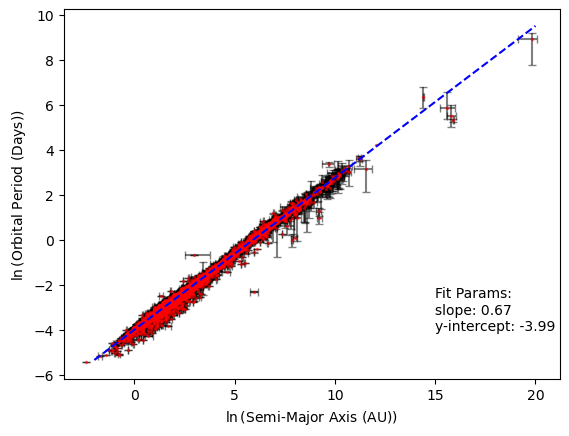

In [70]:
def linear(x, m, b):
    return m*x + b
## Isolate each data and take the log
log_period = np.array(np.log(data_1['pl_orbper'].value))

## Propagate uncertainties for periods
period_err1 = np.abs(np.array(data_1['pl_orbpererr1'].value/data_1['pl_orbper'].value))
period_err2 = np.abs(np.array(data_1['pl_orbpererr2'].value/data_1['pl_orbper'].value))

log_sma = np.array(np.log(data_1['pl_orbsmax'].value))

## Propagate uncertainties for semi major axis
sma_err1 = np.abs(np.array(data_1['pl_orbsmaxerr1'].value/data_1['pl_orbsmax'].value))
sma_err2 = np.abs(np.array(data_1['pl_orbsmaxerr2'].value/data_1['pl_orbsmax'].value))

##Generate x data for line fitting
x = np.linspace(-2, 20)
## Perform lienar regression
b, m = np.polynomial.polynomial.polyfit(log_period,log_sma,1)

##Plot the best fit line
plt.plot(x,linear(x, m, b), linestyle='--', c='blue',zorder=2)

## Plot the data, with error bars specified
plt.errorbar(log_period,log_sma, yerr=[period_err1,period_err2], xerr=[sma_err1, sma_err2],fmt='o', markersize=1.5, c='red',
             ecolor='black', capsize=3,alpha=0.5,zorder=-1)

## Axis labels
plt.xlabel('$\\ln$(Semi-Major Axis (AU))')
plt.ylabel('$\\ln$(Orbital Period (Days))')

## Report the best fit parameters on the plot
plt.text(15, -4,'Fit Params:\nslope: '+str(np.round(m,2)) + '\ny-intercept: ' + str(np.round(b,2)))
plt.show()